In [127]:
# imports required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd, norm
from sklearn.metrics import accuracy_score
import h5py
import os

In [128]:
# function to read data
def load_data_set():
    with h5py.File(os.path.join(os.getcwd(), 'usps.h5'), 'r') as hf:
        train = hf.get('train')
        test = hf.get('test')

        return pd.DataFrame(train.get('data')[:]).T,\
               pd.DataFrame(train.get('target')[:]).T,\
               pd.DataFrame(test.get('data')[:]).T,\
               pd.DataFrame(test.get('target')[:]).T

    return x_train, y_train, x_test, y_test

In [136]:
# Get shape of our data
x_train, y_train, x_test, y_test = load_data_set()

print(x_train.shape) #(256, 7291)
print(y_train.shape) #(1, 7291)
print(x_test.shape) # (256, 2007)
print(y_test.shape) #(1, 2007)

(256, 7291)
(1, 7291)
(256, 2007)
(1, 2007)


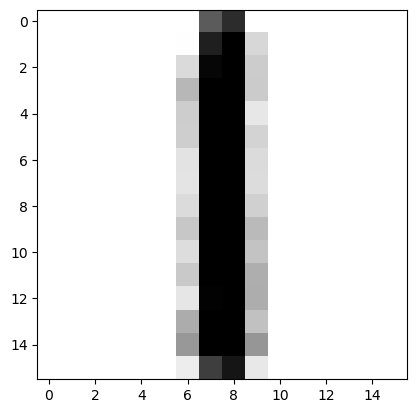

In [137]:
# visualize one of our data
digit_image=x_train[44] # number 1
plt.imshow(digit_image.to_numpy().reshape(16,16), cmap='binary')

In [138]:
# Separate matrices correspond to each digit
digits_matrix ={}
for i in range(10):
    digits_matrix.update({f"A{i}": x_train.loc[:,list(y_train.loc[0,:]==i)]})

for digit in range(10):
    print(f"number of {digit}'s are: {digits_matrix['A'+str(digit)].shape[1]}")


number of 0's are: 1194
number of 1's are: 1005
number of 2's are: 731
number of 3's are: 658
number of 4's are: 652
number of 5's are: 556
number of 6's are: 664
number of 7's are: 645
number of 8's are: 542
number of 9's are: 644


In [139]:
# calculate SVD of each matrix
u_s, s_s, v_t_s = {}, {}, {}
for i in range(10):
    u, s, v_t = svd(digits_matrix['A'+str(i)], full_matrices=False)
    u_s.update({f"u{i}":u})
    s_s.update({f"s{i}":s})
    v_t_s.update({f"v_t{i}":v_t})


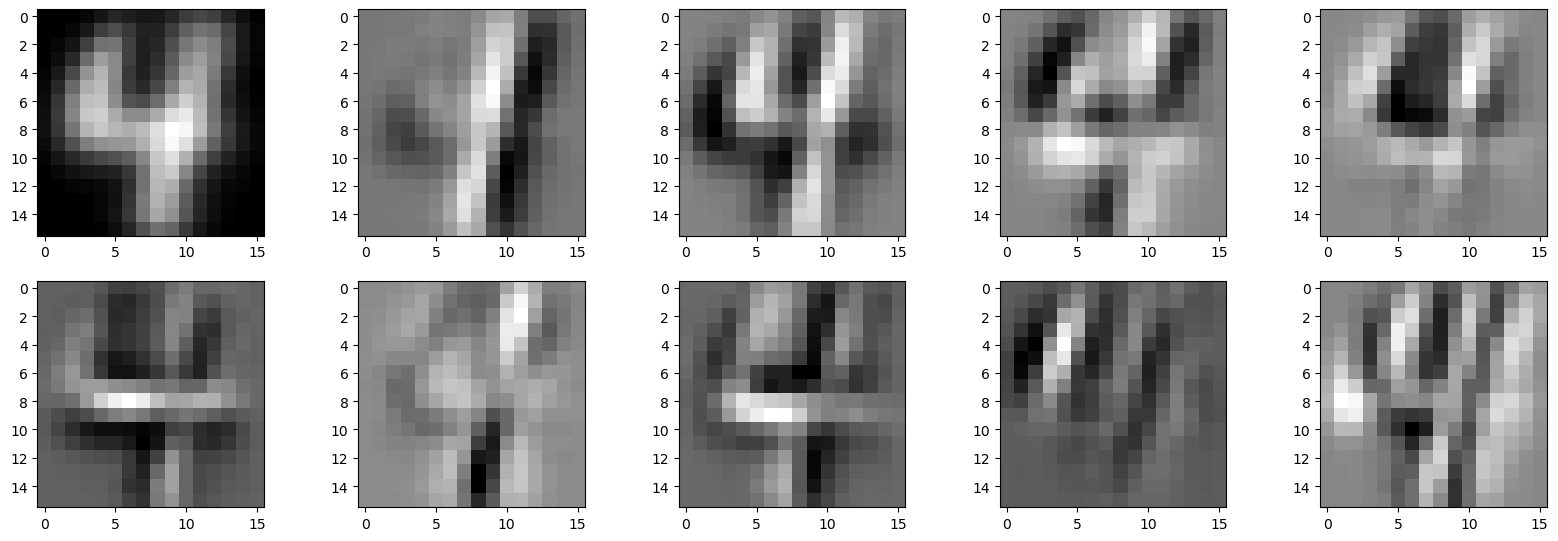

In [140]:
# visualize columns of u{target_digit}
# target_digit in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.figure(figsize=(20,10))
columns = 5
target_digit = '4'
for i in range(10):
    plt.subplot(10 // columns + 1, columns, i + 1)
    plt.imshow(u_s[f"u{target_digit}"][:,i].reshape(16,16), cmap='binary')

In [144]:
# Calculate accuracy score correspond to each k

I = np.eye(x_test.shape[0])
k_s =np.arange(10, 20)
len_test=x_test.shape[1]
predictions=np.empty((y_test.shape[1],0), dtype = int)

for t in list(k_s):
    prediction = []
    for i in range(len_test):
        print(f"t: {t}/{k_s[len(k_s) - 1]}, i: {i}/{len_test}")
        residuals = []
        for j in range(10):
            u=u_s[f"u{j}"][:,0:t]
            res=norm( np.dot(I-np.dot(u,u.T), x_test[i]  ))
            residuals.append(res)
        index_min = np.argmin(residuals)
        prediction.append(index_min)

    prediction=np.array(prediction)
    predictions=np.hstack((predictions,prediction.reshape(-1,1)))
scores=[]

for i in range(len(k_s)):
    score=accuracy_score(y_test.loc[0,:],predictions[:,i])
    scores.append(score)
data={"k":list(k_s), "accuracy_score":scores}
df=pd.DataFrame(data)

t: 9/19, i: 526/2007
t: 9/19, i: 527/2007
t: 9/19, i: 528/2007
t: 9/19, i: 529/2007
t: 9/19, i: 530/2007
t: 9/19, i: 531/2007
t: 9/19, i: 532/2007
t: 9/19, i: 533/2007
t: 9/19, i: 534/2007
t: 9/19, i: 535/2007
t: 9/19, i: 536/2007
t: 9/19, i: 537/2007
t: 9/19, i: 538/2007
t: 9/19, i: 539/2007
t: 9/19, i: 540/2007
t: 9/19, i: 541/2007
t: 9/19, i: 542/2007
t: 9/19, i: 543/2007
t: 9/19, i: 544/2007
t: 9/19, i: 545/2007
t: 9/19, i: 546/2007
t: 9/19, i: 547/2007
t: 9/19, i: 548/2007
t: 9/19, i: 549/2007
t: 9/19, i: 550/2007
t: 9/19, i: 551/2007
t: 9/19, i: 552/2007
t: 9/19, i: 553/2007
t: 9/19, i: 554/2007
t: 9/19, i: 555/2007
t: 9/19, i: 556/2007
t: 9/19, i: 557/2007
t: 9/19, i: 558/2007
t: 9/19, i: 559/2007
t: 9/19, i: 560/2007
t: 9/19, i: 561/2007
t: 9/19, i: 562/2007
t: 9/19, i: 563/2007
t: 9/19, i: 564/2007
t: 9/19, i: 565/2007
t: 9/19, i: 566/2007
t: 9/19, i: 567/2007
t: 9/19, i: 568/2007
t: 9/19, i: 569/2007
t: 9/19, i: 570/2007
t: 9/19, i: 571/2007
t: 9/19, i: 572/2007
t: 9/19, i: 5

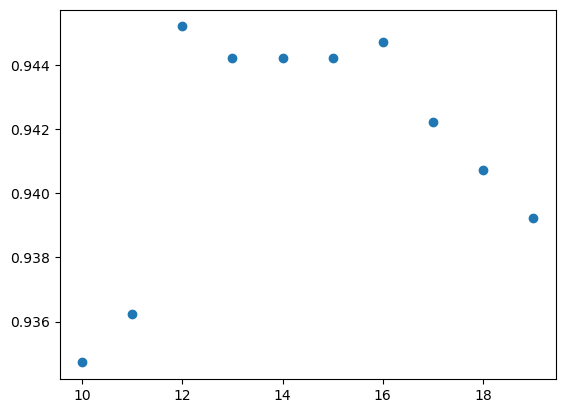

In [145]:
plt.scatter(x=df['k'], y=df['accuracy_score'])

In [ ]:
# We have the most accuracy when k = 12